<a href="https://colab.research.google.com/github/OBIGOD3931/Team-GCP-Hamoye-HDSC-Spring-23-Capstone-Project/blob/main/Global_Household_Electrification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: blue">CAPSTONE PROJECT : Global Household Electrification</h1>

Team GCP © 2023 Hamoye Data Science Internship

---

### Overview: Global Household Electrification

The [Given data repository](https://www.iea.org/data-and-statistics/data-product/monthly-electricity-statistics), the [Electricity Generation Data repository](https://data.world/oecd/electricity-generation/workspace/file?filename=electricity_generation.csv), and the [World Bank Rural Percentage Data repository](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS?end=2022&start=2) contains the datasets used in this notebook **Global Household Electrification**.                        
                          
**The supporting visualization of this project is on [Power BI](https://app.powerbi.com/groups/me/reports/4b2fba83-fa2f-426d-967f-cd953cf47803/ReportSection?experience=power-bi).**                                            
**The presentation slide is hosted on [Google Slides](https://docs.google.com/presentation/d/1FftrI7xLPuh9F2aJcHTrJ0uRDbHPeu1IEv-lX20DSMw/edit#slide=id.p1).**  
**The documentation on this project is hosted on [Google Docs](https://docs.google.com/document/d/1CNIaLIJcwzMxaKX30JzJrSmr7eJkF61kyNXkep5k7cc/edit).**              
**The research article  on this project is hosted on [Google Docs](https://docs.google.com/document/d/18_uIrVqsfzAET3wjd7lRaoK8dZETpv-eZ2sBKlTRNak/edit).**

### Problem Statement

Extensive research has been conducted on household electrification challenges in Sub-Saharan Africa, the variations in access to electricity within OECD (Organization for Economic Cooperation and Development) countries remain an underexplored area of study. Despite being characterized by high levels of economic development, certain segments of populations within OECD countries continue to face inadequate access to electricity, hindering their socio-economic progress and well-being.

The current electrification datasets present a significant challenge due to their inconsistency, inaccuracy, and limited availability. These shortcomings have the potential to impede informed and effective decision-making processes. As a result, the aim of this project is to tackle these pressing issues head-on by focusing on two key areas: refining the existing models and implementing advanced data handling techniques. The goal is t[o cultivate a globally comprehensive and dependable model that can serve as a foundation for making impactful decisions.

# Objective


*   Clean the First given data
*   Clean the Second sourced data
*   Clean the third rural population data
*   Generate urban population feature from the rural data
*   Merged the first data and second data together
*   Merged the previous merged data with the population data
*   Generate electric rural rate and electric urban rate from the final merged data
*   Do the final cleaning
*   Performing EDA to gain insight into the data
*   Preprocessing the data by scaling, checking for imbalanced data, encoding categoraical columns
*   Building a predictive predictive model
*   Applying evaluation methods such as KFold validation to ensure the model reliability
*   Comparing different machine learning models and and identifying the best model suited for the prediction of householde electricity
















In [ ]:
! pip install catboost

: 

In [2]:
# library importation
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
# Loading data from GitHub Raw URLs
df1_url = "https://raw.githubusercontent.com/Adebesin-Aramide/Global_Household_Electrification/main/MES_0423.csv"  # first dataset
df2_url = "https://raw.githubusercontent.com/Adebesin-Aramide/Global_Household_Electrification/main/electricity_generation%20(2).csv"  #second dataset
df_ruralpop_url = "https://raw.githubusercontent.com/Adebesin-Aramide/Global_Household_Electrification/main/API_SP.RUR.TOTL.ZS_DS2_en_csv_v2_5728953.csv" # % rural population

df1 = pd.read_csv(df1_url)
df2 = pd.read_csv(df2_url)
df_ruralpop = pd.read_csv(df_ruralpop_url)

In [4]:
#displaying the shape of the 3 datasets
df1.shape, df2.shape, df_ruralpop.shape

((132019, 6), (4075, 8), (266, 67))

In [5]:
 #first 5 rows of the first dataset
df1.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,April 2023,Net Electricity Production,Electricity,20129.2911,GWh
1,Australia,April 2023,Net Electricity Production,Total Combustible Fuels,13328.1324,GWh
2,Australia,April 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9343.7772,GWh
3,Australia,April 2023,Net Electricity Production,Oil and Petroleum Products,319.9711,GWh
4,Australia,April 2023,Net Electricity Production,Natural Gas,3416.8759,GWh


In [6]:
value_counts = df1['Balance'].value_counts()

print(value_counts)


Balance
Net Electricity Production        101576
Final Consumption (Calculated)      6540
Distribution Losses                 6539
Total Exports                       5951
Total Imports                       5945
Used for pumped storage             5456
Remarks                               12
Name: count, dtype: int64


In [7]:
 #first 5 rows of the second dataset
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.0,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.0,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.0,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.0,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.0,NaN


In [8]:
value_counts = df2['FREQUENCY'].value_counts()

print(value_counts)


FREQUENCY
A    4075
Name: count, dtype: int64


In [9]:
#first 5 rowas of the % rural dataset
df_ruralpop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.22400,49.23900,49.254000,49.270000,49.285000,49.300000,...,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,55.948000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.43619,85.18859,84.930751,84.652024,84.359805,84.058718,...,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301,62.175407


In [10]:
value_counts = df_ruralpop['Indicator Code'].value_counts()

print(value_counts)


Indicator Code
SP.RUR.TOTL.ZS    266
Name: count, dtype: int64


### Cleaning DF1

In [11]:
#displaying the unique years in df1
df1['Time'].unique()

array(['April 2023', 'March 2023', 'February 2023', 'January 2023',
       'December 2022', 'November 2022', 'October 2022', 'September 2022',
       'August 2022', 'July 2022', 'June 2022', 'May 2022', 'April 2022',
       'March 2022', 'February 2022', 'January 2022', 'December 2021',
       'November 2021', 'October 2021', 'September 2021', 'August 2021',
       'July 2021', 'June 2021', 'May 2021', 'April 2021', 'March 2021',
       'February 2021', 'January 2021', 'December 2020', 'November 2020',
       'October 2020', 'September 2020', 'August 2020', 'July 2020',
       'June 2020', 'May 2020', 'April 2020', 'March 2020',
       'February 2020', 'January 2020', 'December 2019', 'November 2019',
       'October 2019', 'September 2019', 'August 2019', 'July 2019',
       'June 2019', 'May 2019', 'April 2019', 'March 2019',
       'February 2019', 'January 2019', 'December 2018', 'November 2018',
       'October 2018', 'September 2018', 'August 2018', 'July 2018',
       'June 2018

In [12]:
#displaying the unique and number of unique countries in df1
print(df1.Country.unique())
print(df1.Country.nunique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Republic of Turkiye' 'United Kingdom' 'United States'
 'OECD Americas' 'OECD Asia Oceania' 'OECD Europe' 'OECD Total'
 'IEA Total' 'Argentina' 'Brazil' 'Bulgaria' "People's Republic of China"
 'Croatia' 'Cyprus' 'India' 'Malta' 'North Macedonia' 'Romania' 'Serbia']
53


In [13]:
#Convert the 'Time' column to represent the year only
df1['Time'] = pd.to_datetime(df1['Time'], format='mixed').dt.year

# Drop all rows with '2023' in the 'Time' column because we are still in the year 2023, hence no complete information to use
df1 = df1[df1['Time'] != 2023]

# Group by 'Time' (year) and calculate the mean 'Value' for each year
df11 = df1.groupby(['Country','Time'], as_index = False)['Value'].mean()
# Renamed the 'Time' column to year
df11.rename(columns={'Time': 'Year'}, inplace=True)
print(df11.shape)
print(df11.head())


(619, 3)
     Country  Year        Value
0  Argentina  2015  2424.100780
1  Argentina  2016  2633.561635
2  Argentina  2017  2640.507181
3  Argentina  2018  2290.702425
4  Argentina  2019  2172.046544


In [14]:
# Mapping of country names to ISO 3166-1 alpha-3 country codes
country_mapping = {
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Belgium': 'BEL',
    'Canada': 'CAN',
    'Chile': 'CHL',
    'Colombia': 'COL',
    'Costa Rica': 'CRI',
    'Czech Republic': 'CZE',
    'Denmark': 'DNK',
    'Estonia': 'EST',
    'Finland': 'FIN',
    'France': 'FRA',
    'Germany': 'DEU',
    'Greece': 'GRC',
    'Hungary': 'HUN',
    'Iceland': 'ISL',
    'Ireland': 'IRL',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Korea': 'KOR',
    'Latvia': 'LVA',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Mexico': 'MEX',
    'Netherlands': 'NLD',
    'New Zealand': 'NZL',
    'Norway': 'NOR',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Slovak Republic': 'SVK',
    'Slovenia': 'SVN',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Republic of Turkiye': 'TUR',
    'United Kingdom': 'GBR',
    'United States': 'USA',
    'OECD Americas': 'OECD Americas',
    'OECD Asia Oceania': 'OECD Asia Oceania',
    'OECD Europe': 'OECD Europe',
    'OECD Total': 'OECD Total',
    'IEA Total': 'IEA Total',
    'Argentina': 'ARG',
    'Brazil': 'BRA',
    'Bulgaria': 'BGR',
    "People's Republic of China": 'CHN',
    'Croatia': 'HRV',
    'Cyprus': 'CYP',
    'India': 'IND',
    'Malta': 'MLT',
    'North Macedonia': 'MKD',
    'Romania': 'ROU',
    'Serbia': 'SRB'
}

# Convert the countries to three-letter codes
df11['Location'] = df11['Country'].map(country_mapping)

df11.head()

,Country,Year,Value,Location
0,Argentina,2015,2424.100780,ARG
1,Argentina,2016,2633.561635,ARG
2,Argentina,2017,2640.507181,ARG
3,Argentina,2018,2290.702425,ARG
4,Argentina,2019,2172.046544,ARG


In [15]:
#dropping the country column
df11.drop(columns=['Country'], inplace=True)
df11.head()


,Year,Value,Location
0,2015,2424.100780,ARG
1,2016,2633.561635,ARG
2,2017,2640.507181,ARG
3,2018,2290.702425,ARG
4,2019,2172.046544,ARG


In [16]:
#dropping the non oecd countries that are not needed for the analysis
Non_oecd_countries = ['OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total','IEA Total',
                        'ARG', 'BRA', 'BGR', 'CHN', 'HRV', 'CYP', 'IND', 'MLT', 'MKD','ROU', 'SRB']
df11 = df11[~df11['Location'].isin(Non_oecd_countries)]


In [17]:
print(df11.shape)
print(df11.isnull().sum())
print(df11.head())

(466, 3)
Year        0
Value       0
Location    0
dtype: int64
    Year        Value Location
8   2010  5647.552607      AUS
9   2011  5704.477327      AUS
10  2012  5648.446357      AUS
11  2013  5527.160292      AUS
12  2014  5691.561250      AUS


In [18]:
# check for Zero value
print(len(df11[df11['Value'] == 0]))

0


### Cleaning DF2

In [19]:
#displaying the first five rows in df2
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.0,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.0,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.0,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.0,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.0,NaN


In [20]:
df2['Flag Codes'].value_counts()

Flag Codes
L    192
M    120
Z     17
Name: count, dtype: int64

In [21]:
#displaying the unique and number of unique countries in df2
print(df2.LOCATION.unique())
print(df2.LOCATION.nunique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'OEU' 'CHL' 'EST' 'ISR' 'SVN' 'OECD'
 'RUS' 'BRA' 'WLD' 'CHN' 'IDN' 'ZAF' 'IND' 'EU28']
44


In [22]:
non_oecd_countries = ['OEU', 'OECD', 'RUS', 'BRA', 'WLD', 'IDN', 'ZAF', 'IND', 'EU28', 'CHN']
df2 = df2[~df2['LOCATION'].isin(non_oecd_countries)]

In [23]:
# Drop the unwanted columns
columns_to_drop = ['SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes', 'INDICATOR']
df2.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Rename the 'TIME', 'LOCATION' and INDICATOR column to 'Year', 'Location' and 'Product' respectively
df2.rename(columns={'TIME': 'Year', 'LOCATION': 'Location'}, inplace=True)

df2.head()

,Location,Year,Value
0,AUS,1960,0.0
1,AUS,1961,0.0
2,AUS,1962,0.0
3,AUS,1963,0.0
4,AUS,1964,0.0


In [25]:
#checking for missing values
print(df2.isnull().sum())

Location      0
Year          0
Value       188
dtype: int64


In [26]:
#filling the missing values using the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df2['Value'] = knn_imputer.fit_transform(df2[['Value']])

In [27]:
print(df2.isnull().sum())
print(df2.shape)

Location    0
Year        0
Value       0
dtype: int64
(3842, 3)


In [28]:
# check for Zero value
print(len(df2[df2['Value'] == 0]))
print(df2[df2['Value'] == 0].head())
print(df2[df2['Value'] == 0].tail())


1599
  Location  Year  Value
0      AUS  1960    0.0
1      AUS  1961    0.0
2      AUS  1962    0.0
3      AUS  1963    0.0
4      AUS  1964    0.0
     Location  Year  Value
4061      ITA  2014    0.0
4062      LUX  2014    0.0
4067      GRC  2014    0.0
4068      IRL  2014    0.0
4071      POL  2014    0.0


In [29]:
#Some values in our df have 0, converting the 0 values  to nan
df2['Value'] = df2['Value'].replace(0, float('nan'))
df2['Value'].isnull().sum()


1599

In [30]:
#using the KNNImputer to fill the nan values
nn_imputer = KNNImputer(n_neighbors=5)
df2['Value'] = knn_imputer.fit_transform(df2[['Value']])

### Cleaning DF rural population

In [31]:
#  convert the wide row format with years as columns into a long column forma
df_ruralpop = pd.melt(df_ruralpop, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')

df_ruralpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,85.436190
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.599000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,85.294609
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565000


In [32]:
# Drop the unwanted columns
columns_to_drop = ['Country Name', 'Indicator Name', 'Indicator Code']
df_ruralpop.drop(columns=columns_to_drop, inplace=True)

# Renaming the Time and Value column
df_ruralpop.rename(columns={'TIME': 'Time', 'Value': 'rural pop', 'Country Code': 'Location'}, inplace=True)
df_ruralpop.head()

,Location,Year,rural pop
0,ABW,1960,49.224000
1,AFE,1960,85.436190
2,AFG,1960,91.599000
3,AFW,1960,85.294609
4,AGO,1960,89.565000


In [33]:
#getting the percentage of urban population by subtracting the rural percentage from 100
df_ruralpop['urban pop'] = 100 - df_ruralpop['rural pop']

# Change the dtype of Year column from 'object' to 'int64'
df_ruralpop['Year'] = df_ruralpop['Year'].astype('int64')

df_ruralpop.head()


,Location,Year,rural pop,urban pop
0,ABW,1960,49.224000,50.776000
1,AFE,1960,85.436190,14.563810
2,AFG,1960,91.599000,8.401000
3,AFW,1960,85.294609,14.705391
4,AGO,1960,89.565000,10.435000


In [34]:
#filtering for OECD countries in the df_ruralpop
country = ["AUS", "AUT", "BEL", "CAN", "CHL", "COL",
          "CRI", "CZE", "DNK", "EST", "FIN", "FRA",
           "DEU", "GRC", "HUN", "ISL", "IRL", "ISR",
           "ITA", "JPN", "KOR", "LVA", "LTU", "LUX",
           "MEX", "NLD", "NZL", "NOR", "POL", "PRT",
           "SVK", "SVN", "ESP", "SWE", "CHE", "TUR", "GBR", "USA"]
df_perc_pop = df_ruralpop[df_ruralpop["Location"].isin(country)]
df_perc_pop.head()

,Location,Year,rural pop,urban pop
13,AUS,1960,18.471,81.529
14,AUT,1960,35.280,64.720
17,BEL,1960,7.540,92.460
35,CAN,1960,30.939,69.061
37,CHE,1960,29.076,70.924


In [35]:
#checking for missing values in the percentage column
print(df_perc_pop.isnull().sum())
print('\n')

# check for Zero pop
print('rural Zero:', len(df_perc_pop[df_perc_pop['rural pop'] == 0]))

Location     0
Year         0
rural pop    0
urban pop    0
dtype: int64


rural Zero: 0


In [36]:
#displaying the first five rows of the three dataset
print(df11.head())
print('----------------')
print(df2.head())
print('----------------')
print(df_perc_pop.head())

    Year        Value Location
8   2010  5647.552607      AUS
9   2011  5704.477327      AUS
10  2012  5648.446357      AUS
11  2013  5527.160292      AUS
12  2014  5691.561250      AUS
----------------
  Location  Year          Value
0      AUS  1960  180212.258898
1      AUS  1961  180212.258898
2      AUS  1962  180212.258898
3      AUS  1963  180212.258898
4      AUS  1964  180212.258898
----------------
   Location  Year  rural pop  urban pop
13      AUS  1960     18.471     81.529
14      AUT  1960     35.280     64.720
17      BEL  1960      7.540     92.460
35      CAN  1960     30.939     69.061
37      CHE  1960     29.076     70.924


In [37]:
print(df11.shape)
print('--------')
print(df2.shape)
print('--------')
print(df_perc_pop.shape)

(466, 3)
--------
(3842, 3)
--------
(2394, 4)


#### Concatenating the Dataframe

In [38]:
# concatenate df11 and df2 from 1960 - 2022
new_df = pd.concat([df2,df11])

In [39]:
#displaying the first 5 roes of the new_df
print(new_df.head())
#checking for missing values after concatenating
print(new_df.isnull().sum())
#displaying the number of rows and columns
print(new_df.shape)

  Location  Year          Value
0      AUS  1960  180212.258898
1      AUS  1961  180212.258898
2      AUS  1962  180212.258898
3      AUS  1963  180212.258898
4      AUS  1964  180212.258898
Location    0
Year        0
Value       0
dtype: int64
(4308, 3)


In [40]:
#displaying the number of unique and unique countries in the new_df
print(new_df['Location'].unique())
print(new_df['Location'].nunique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'EST' 'ISR' 'SVN' 'COL' 'CRI'
 'LVA' 'LTU']
38


In [41]:
#displaying the unique year in the new_df
print(new_df['Year'].unique())
print('-----------------------------------')
print(new_df.Year.nunique())

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022]
-----------------------------------
63


In [42]:
#displaying the imformation of the new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4308 entries, 0 to 618
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  4308 non-null   object 
 1   Year      4308 non-null   int64  
 2   Value     4308 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.6+ KB


In [43]:
#merging the  new_df with the percentage population df (df_perc_pop)
merged_df = new_df.merge(df_perc_pop, on=['Location', 'Year'], how='left')

In [44]:
#displaying the first 5 rows of the merged dataset
merged_df.head()

,Location,Year,Value,rural pop,urban pop
0,AUS,1960,180212.258898,18.471,81.529
1,AUS,1961,180212.258898,18.059,81.941
2,AUS,1962,180212.258898,17.772,82.228
3,AUS,1963,180212.258898,17.489,82.511
4,AUS,1964,180212.258898,17.208,82.792


In [45]:
zero_value_years = merged_df[merged_df['Value'] == 0]['Year'].unique()
print(zero_value_years)

[]


In [46]:
# check for Zero value

zero_value = len(merged_df[merged_df['Value'] == 0])
print(zero_value)

0


In [47]:
#creating two new features "electric_rural" and "electric_urban" using the formula below
merged_df['electric_rural'] = ((merged_df['rural pop'] / 100) * merged_df['Value'])
merged_df['electric_urban'] = (merged_df['urban pop'] / 100) * merged_df['Value']

In [48]:
#displaying the  first 5 rows of the merged_df
print(merged_df.head())
print('-------------------')
#displaying the new number of rows and columns of the merged_df
print(merged_df.shape)
print('-------------------')
#checking for missing values in the merged_df
print(merged_df.isnull().sum())

  Location  Year          Value  rural pop  urban pop  electric_rural  \
0      AUS  1960  180212.258898     18.471     81.529    33287.006341   
1      AUS  1961  180212.258898     18.059     81.941    32544.531834   
2      AUS  1962  180212.258898     17.772     82.228    32027.322651   
3      AUS  1963  180212.258898     17.489     82.511    31517.321959   
4      AUS  1964  180212.258898     17.208     82.792    31010.925511   

   electric_urban  
0   146925.252557  
1   147667.727063  
2   148184.936246  
3   148694.936939  
4   149201.333386  
-------------------
(4308, 7)
-------------------
Location          0
Year              0
Value             0
rural pop         0
urban pop         0
electric_rural    0
electric_urban    0
dtype: int64


In [49]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y').dt.year

In [50]:
merged_df.head()

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


In [51]:
merged_df.to_csv('merged_data1.csv', index=False)


# EDA

In [52]:
df = pd.read_csv('merged_data1.csv')
df.head()

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


In [53]:
# Reset the index
df.reset_index(drop=True, inplace=True)

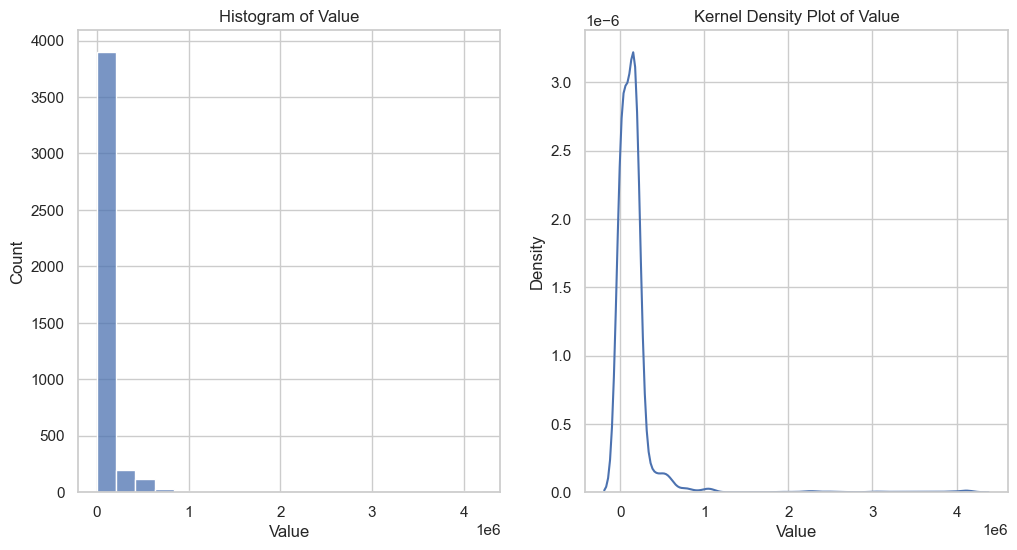

<Figure size 640x480 with 0 Axes>

In [54]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df['Value'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of Value')

# Kernel Density Plot
sns.kdeplot(df['Value'], ax=axes[1])
axes[1].set_title('Kernel Density Plot of Value')

# Adjust layout

plt.show()
plt.savefig('Value_dist.png')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        4308 non-null   object 
 1   Year            4308 non-null   int64  
 2   Value           4308 non-null   float64
 3   rural pop       4308 non-null   float64
 4   urban pop       4308 non-null   float64
 5   electric_rural  4308 non-null   float64
 6   electric_urban  4308 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 235.7+ KB


In [56]:
num_col = df.select_dtypes("float")

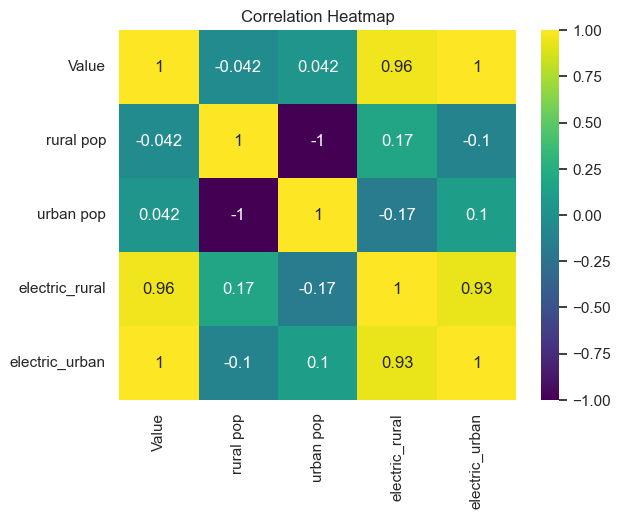

<Figure size 640x480 with 0 Axes>

In [57]:
# Create a larger figure
# plt.figure(figsize=(16, 10))

# Create a heatmap using seaborn
sns.heatmap(num_col.corr(), cmap='viridis', annot=True)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
plt.savefig('corr_map.png')

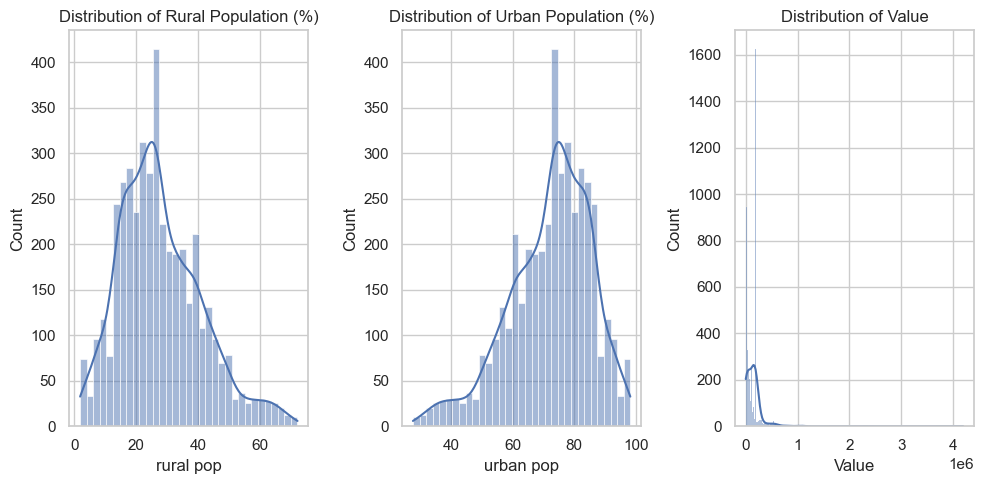

In [58]:
# Distribution Plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['rural pop'], kde=True)
plt.title("Distribution of Rural Population (%)")

plt.subplot(1, 3, 2)
sns.histplot(df['urban pop'], kde=True)
plt.title("Distribution of Urban Population (%)")

plt.subplot(1, 3, 3)
sns.histplot(df['Value'], kde=True)
plt.title("Distribution of Value")

plt.tight_layout()
plt.show()

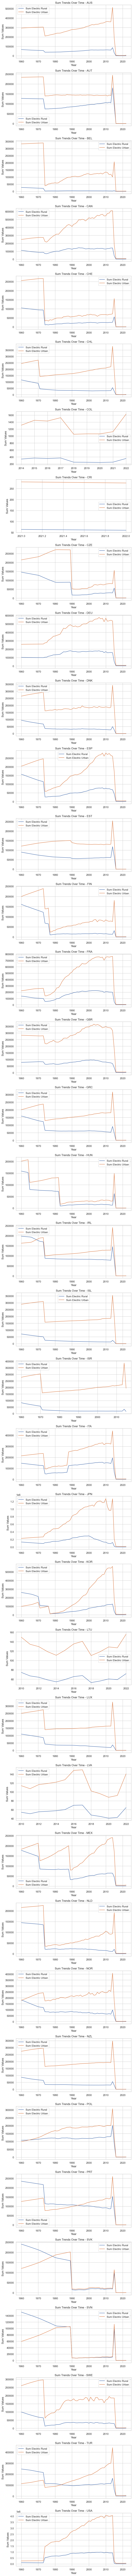

In [59]:
# Group by Location and Year and calculate mean values
grouped_df = df.groupby(['Location', 'Year']).sum().reset_index()

# Line Plots Over Time for Mean Values Grouped by Location
locations = grouped_df['Location'].unique()
num_locations = len(locations)

plt.figure(figsize=(8, 4 * num_locations), dpi=100)

for i, location in enumerate(locations, start=1):
    plt.subplot(num_locations, 1, i)
    location_data = grouped_df[grouped_df['Location'] == location]
    sns.lineplot(data=location_data, x='Year', y='electric_rural', label='Sum Electric Rural')
    sns.lineplot(data=location_data, x='Year', y='electric_urban', label='Sum Electric Urban')
    plt.xlabel("Year")
    plt.ylabel("Sum Values")
    plt.title(f"Sum Trends Over Time - {location}")
    plt.legend()

plt.tight_layout()
plt.show()

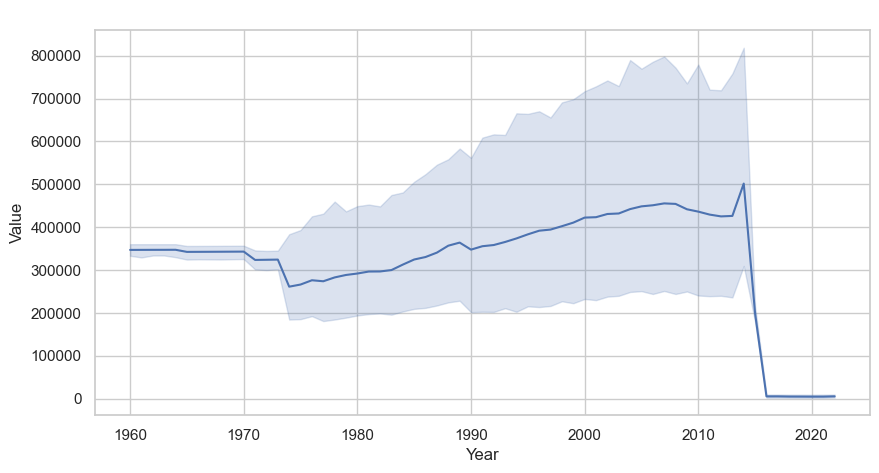

<Figure size 640x480 with 0 Axes>

In [60]:
# Line Plot: Total Value Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_df, x='Year', y='Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(' ')
plt.show()
plt.savefig('trend.png')

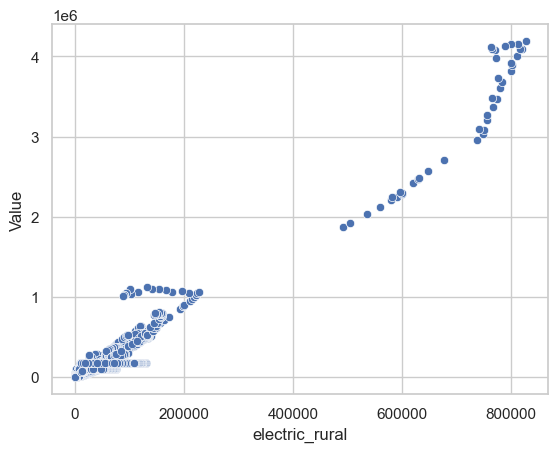

In [61]:
sns.scatterplot(x=df['electric_rural'], y=df['Value']);


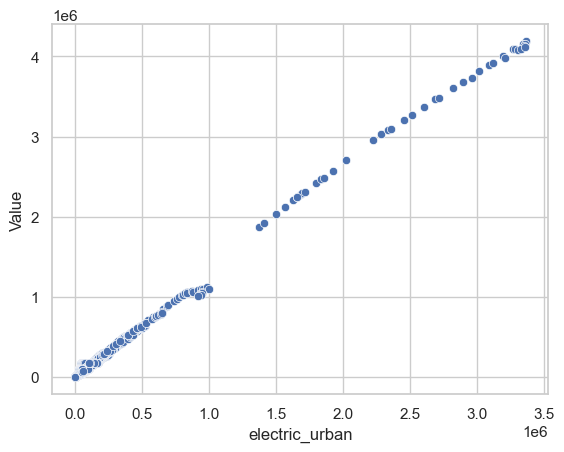

In [62]:
sns.scatterplot(x=df['electric_urban'], y=df['Value']);

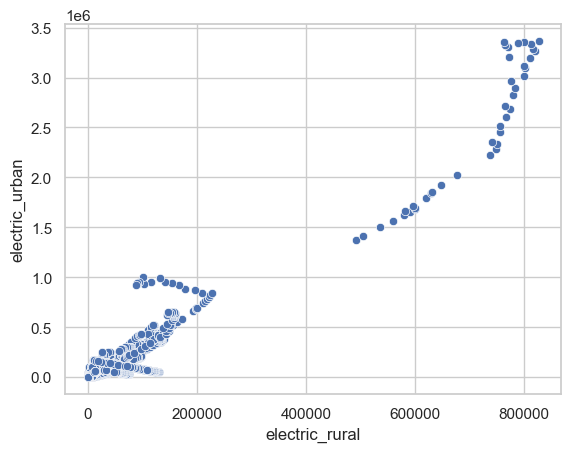

In [63]:
sns.scatterplot(x=df['electric_rural'], y=df['electric_urban']);

In [64]:
print(df.shape)
print('----------------')
df.head()

(4308, 7)
----------------


,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


# Data Preprocessing

In [65]:
# Drop "electric_urban" due to avoid multcolinearity with "electric_rural"
df = df.drop(columns=['electric_urban'])
df.head()


,Location,Year,Value,rural pop,urban pop,electric_rural
0,AUS,1960,180212.258898,18.471,81.529,33287.006341
1,AUS,1961,180212.258898,18.059,81.941,32544.531834
2,AUS,1962,180212.258898,17.772,82.228,32027.322651
3,AUS,1963,180212.258898,17.489,82.511,31517.321959
4,AUS,1964,180212.258898,17.208,82.792,31010.925511


In [66]:
# Use qcut method to convert "Value" continuous variable to a categorical variable with three classes; Low, Medium and High
df['Value_class'] = pd.qcut(df['Value'], q=3, labels=['Low', 'Medium', 'High'])
df.head()

,Location,Year,Value,rural pop,urban pop,electric_rural,Value_class
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,Medium
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,Medium
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,Medium
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,Medium
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,Medium


**Calculate and display the range of the classess, Low, Medium and High**

In [67]:
# Calculate the quantiles of 'Value' column
quantiles = df['Value'].squeeze().quantile([0, 1/3, 2/3, 1])

# Extract the quantile values
low_quantile_value = quantiles.iloc[0]
medium_quantile_value = quantiles.iloc[1]
high_quantile_value = quantiles.iloc[2]
max_value = quantiles.iloc[3]

print(f"Low Quantile Value: {low_quantile_value}")
print(f"Medium Quantile Value: {medium_quantile_value}")
print(f"High Quantile Value: {high_quantile_value}")
print(f"Max Value: {max_value}")
print('-----------------------------------------')
print(f'Range of Low: {round(low_quantile_value, 3)} - {round(medium_quantile_value, 3)}')
print(f'Range of Medium: {round(medium_quantile_value,3)} - {round(high_quantile_value,3)}')
print(f'Range of High: {round(high_quantile_value,3)} - {round(high_quantile_value,3)}')

Low Quantile Value: 3.5
Medium Quantile Value: 51569.33333333331
High Quantile Value: 180212.25889755905
Max Value: 4190552.0
-----------------------------------------
Range of Low: 3.5 - 51569.333
Range of Medium: 51569.333 - 180212.259
Range of High: 180212.259 - 180212.259


In [68]:
# Drop the 'Value' column
df.drop(columns='Value', inplace=True)
df.head()

,Location,Year,rural pop,urban pop,electric_rural,Value_class
0,AUS,1960,18.471,81.529,33287.006341,Medium
1,AUS,1961,18.059,81.941,32544.531834,Medium
2,AUS,1962,17.772,82.228,32027.322651,Medium
3,AUS,1963,17.489,82.511,31517.321959,Medium
4,AUS,1964,17.208,82.792,31010.925511,Medium


3
['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']
Value_class
Medium    0.563835
Low       0.333333
High      0.102832
Name: proportion, dtype: float64


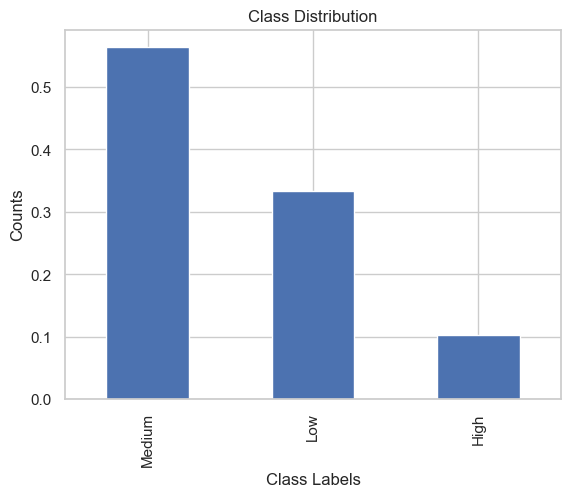

In [69]:
# Print out the result of the grouping and check for imbalanced dataset
print(df['Value_class'].nunique())
print(df['Value_class'].unique())
print(df['Value_class'].value_counts(normalize=True))
df['Value_class'].value_counts(normalize=True).plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.show()

The graph shows that the dataset is imbalance. It will be treated after splitting the dataset

**Splitting the dataset**

In [70]:
# Split the dataset usin train-test split from sklearn

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Value_class'])
y = df['Value_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3446, 5)
X_test shape: (862, 5)
y_train shape: (3446,)
y_test shape: (862,)


In [71]:
ydecode = y_test
ydecode

2679       Low
3715    Medium
2354    Medium
1815    Medium
3099       Low
         ...  
1510    Medium
3025    Medium
631        Low
3589    Medium
3229      High
Name: Value_class, Length: 862, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [72]:
X_test.head(10)

,Location,Year,rural pop,urban pop,electric_rural
2679,SVK,2007,44.739,55.261,11527.450740
3715,SVN,1979,53.099,46.901,55865.357936
2354,POL,1962,51.074,48.926,92041.609109
1815,LUX,1983,19.443,80.557,35038.669497
3099,TUR,1979,56.645,43.355,11999.110350
438,CAN,2006,19.787,80.213,116412.461360
2659,SVK,1987,44.895,55.105,80906.293632
3836,GRC,2014,22.298,77.702,40183.729489
1055,GRC,2007,24.801,75.199,44694.442329
2021,NLD,1965,39.247,60.753,70727.905250


**Encode the categorical**

In [73]:
# Initialize LabelEncoder instances
label_encoder = LabelEncoder()
label_encoder_y = LabelEncoder()
label_encoder_ytest = LabelEncoder()

# Encode the categorical columns
X_train['Location'] = label_encoder.fit_transform(X_train['Location'])
X_test['Location'] = label_encoder.transform(X_test['Location'])
y_train = label_encoder_y.fit_transform(y_train)
y_test = label_encoder_ytest.fit_transform(y_test)
print(y_train)
X_train.head()


[1 2 1 ... 2 2 0]


,Location,Year,rural pop,urban pop,electric_rural
1954,27,2010,22.185,77.815,1255.892850
3306,37,1962,29.243,70.757,52699.470869
3098,36,1978,57.069,42.931,11699.145000
2328,29,1992,27.335,72.665,31856.209000
388,3,2012,18.863,81.137,16880.875960


In [74]:
yenncode = y_test
yenncode[:7]

array([1, 2, 2, 2, 1, 0, 2])

In [75]:
ydecodencode = {'yenncode': yenncode, 'ydecode': ydecode}


In [76]:
ydecodencodedf = pd.DataFrame(ydecodencode)
ydecodencodedf.head(7)

,yenncode,ydecode
2679,1,Low
3715,2,Medium
2354,2,Medium
1815,2,Medium
3099,1,Low
438,0,High
2659,2,Medium


In [77]:
ydecodencodedf['yenncode'].unique()

array([1, 2, 0])

In [78]:
ydecodencodedf['ydecode'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

**Balance the dataset**

In [79]:
# Balance the dataset using smote
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE:
Value_class
Medium    2429
Low       1436
High       443
Name: count, dtype: int64

Class distribution after SMOTE:
1    1943
2    1943
0    1943
Name: count, dtype: int64


**Scaling the dataset**

In [80]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features on the training set
X_train_df_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train.columns)

# Transform numerical features on the test set using the same scaler
X_test_df_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Scaled training set:")
print(X_train_df_scaled)

print("\nScaled test set:")
print(X_test_df_scaled)

Scaled training set:
      Location      Year  rural pop  urban pop  electric_rural
0     0.778270  1.060252  -0.357797   0.357797       -0.533877
1     1.714431 -1.996987   0.252130  -0.252130       -0.121834
2     1.620815 -0.977908   2.656753  -2.656753       -0.450231
3     0.965503 -0.086213   0.087248  -0.087248       -0.288781
4    -1.468514  1.187637  -0.644872   0.644872       -0.408727
...        ...       ...        ...        ...             ...
5824  0.497422  1.187637   0.544709  -0.544709       -0.543358
5825 -0.064274  0.869175  -1.075791   1.075791       -0.495814
5826  0.310190  1.442407  -0.700147   0.700147       -0.529071
5827 -1.281282  1.251330  -1.174849   1.174849       -0.542038
5828 -0.719586 -0.595753  -0.194437   0.194437       -0.453616

[5829 rows x 5 columns]

Scaled test set:
     Location      Year  rural pop  urban pop  electric_rural
0    1.339967  0.869175   1.591239  -1.591239       -0.451606
1    1.433583 -0.914215   2.313680  -2.313680       -0.0

# Model Building

In [81]:
# Convert y_train to a pandas series
pd.Series(y_train).value_counts()

2    1943
1    1149
0     354
Name: count, dtype: int64

Model Baseline

In [82]:
# Obtain the normalized maximum value count as the baseline accuracy
acc_baseline = pd.Series(y_train).value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5638


Train multiple model...

('DTC', array([0.9897084 , 0.98885077, 0.99056604, 0.98799314, 0.99227468]), 0.989879, 0.001473)
('RFC', array([0.99571184, 0.99142367, 0.9948542 , 0.99313894, 0.99570815]), 0.994167, 0.001662)
('GBC', array([0.99399657, 0.9897084 , 0.98713551, 0.98799314, 0.98798283]), 0.989363, 0.002463)
('ADBC', array([0.83619211, 0.71012007, 0.81389365, 0.82847341, 0.83347639]), 0.804431, 0.04778)
('XGB', array([0.99571184, 0.99142367, 0.9922813 , 0.99313894, 0.99399142]), 0.993309, 0.001475)
('LGB', array([0.99828473, 0.99142367, 0.9922813 , 0.99399657, 0.99399142]), 0.993996, 0.002364)
('CBC', array([0.99656947, 0.9948542 , 0.99142367, 0.99142367, 0.99742489]), 0.994339, 0.00252)
('SVC', array([0.94682676, 0.93910806, 0.94682676, 0.95454545, 0.94935622]), 0.947333, 0.004985)
('GNB', array([0.84133791, 0.81989708, 0.83876501, 0.84476844, 0.82918455]), 0.834791, 0.009072)
('LGR', array([0.93396226, 0.9219554 , 0.94339623, 0.94168096, 0.93648069]), 0.935495, 0.007581)
('KNC', array([0.94854202, 0.92

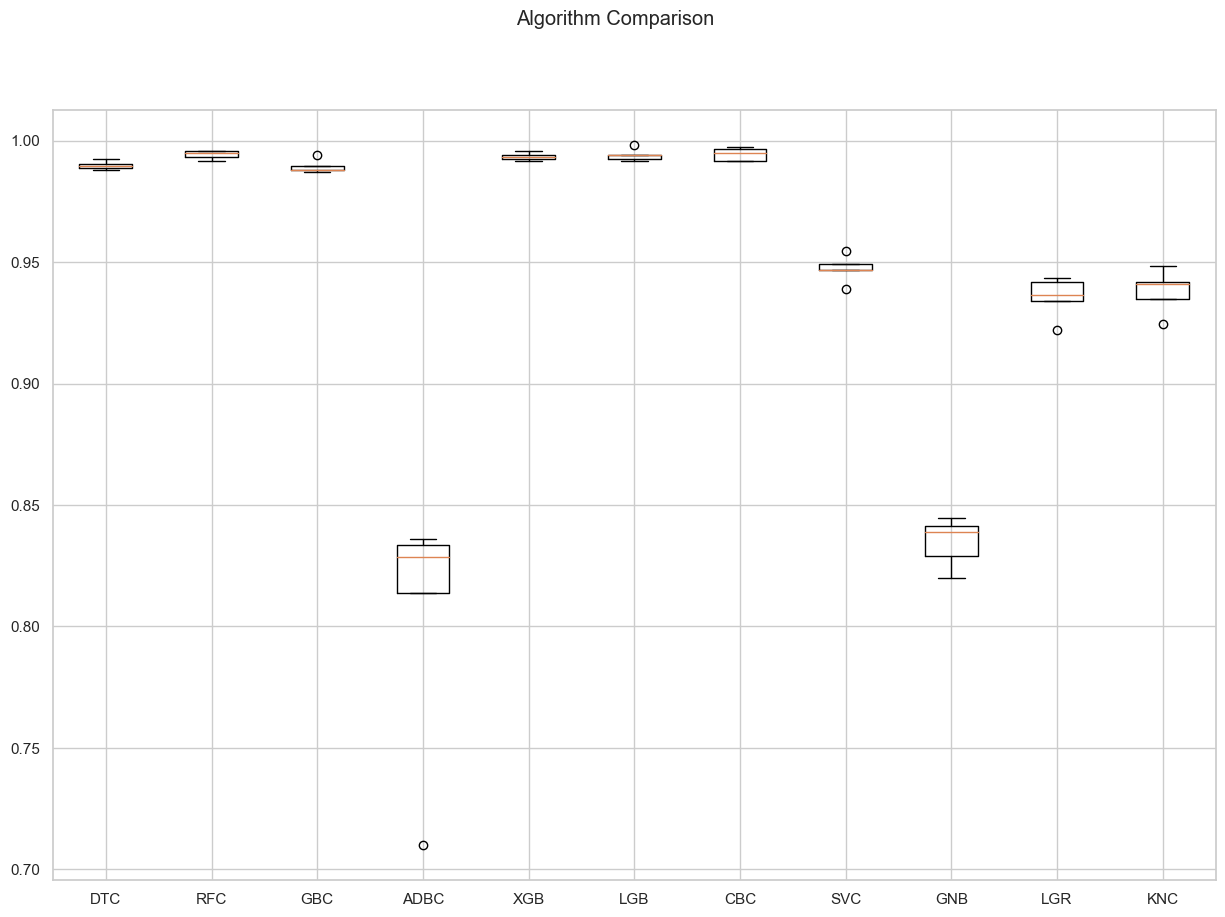

In [83]:
# Comparing Miltiple Algorithms

models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ADBC', AdaBoostClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('LGB', lgb.LGBMClassifier(verbose=-1)))
models.append(('CBC', CatBoostClassifier(verbose=False)))
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('LGR', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))



numFolds = 5
# evaluate each model in turn
results = []
names = []
acc_train = []
acc_test = []


for name, model in models:


  kfold = KFold(n_splits=numFolds, shuffle=True, random_state=42)
  cv_results = cross_val_score(model, X_train_df_scaled, y_train_resampled, scoring='accuracy', cv=kfold)
  results.append(cv_results)
  names.append(name)
  msg = (name, cv_results, round(cv_results.mean(), 6), round(cv_results.std(), 6))




  print(msg)


# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LGB model seems to generalize better on the different folds of the training data

**Iterate**

In [84]:
# Fit a model using lgb classifier
LGB = lgb.LGBMClassifier(verbose=-1)
LGB.fit(X_train_df_scaled, y_train_resampled)

LGBMClassifier(verbose=-1)

**Evaluate**

In [85]:
# Evaluate on train and test data
acc_train = LGB.score(X_train_df_scaled, y_train_resampled)
acc_test = LGB.score(X_test_df_scaled, y_test)

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.994199535962877


**confusion matrix and classification report**

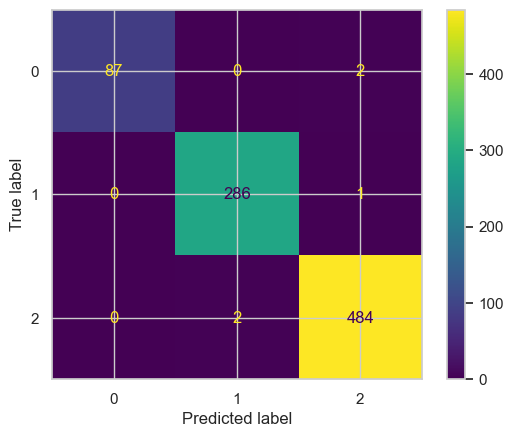

In [86]:
# Plot confusion matrix
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

ConfusionMatrixDisplay.from_estimator(LGB, X_test_df_scaled, y_test);

In [87]:
# Print classification report
print(classification_report(y_test, LGB.predict(X_test_df_scaled))
)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.99      1.00      0.99       287
           2       0.99      1.00      0.99       486

    accuracy                           0.99       862
   macro avg       1.00      0.99      0.99       862
weighted avg       0.99      0.99      0.99       862



In [88]:
preds = LGB.predict(X_test_df_scaled)
preds


array([1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2,
       1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1,

**Communicate**

Obtain and visualize the feature importance.

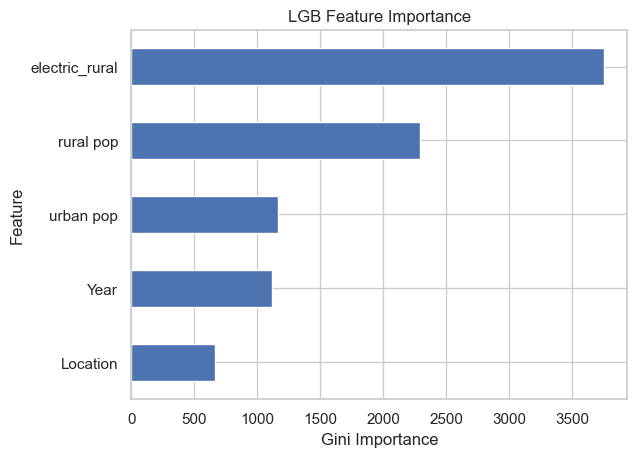

In [89]:
# Get importances
importances = LGB.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_df_scaled.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("LGB Feature Importance");

**Save model**

In [90]:
# Save model as pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(LGB, f)

In [91]:
model=pickle.load(open('model.pkl','rb'))
model

LGBMClassifier(verbose=-1)

In [92]:
pre = model.predict(X_test_df_scaled.head(7))
pre


array([1, 2, 2, 2, 1, 0, 2])